# PANGAEApy
## Introduction and examples for PANGAEA community workshop 2022

### This script shows an example of searching and downloading multiple files via pangaeapy

#### For more information on pangaeapy look here: https://github.com/pangaea-data-publisher/pangaeapy


In [110]:
# import necessary packages
import pangaeapy as pan
from pangaeapy.pandataset import PanDataSet
import pandas as pd
import re
import os

In [111]:
# show functions of pangaeapy
help(pan)

Help on package pangaeapy:

NAME
    pangaeapy

DESCRIPTION
    pangaeapy is a package allowing to download and analyse metadata
    as well as data from tabular PANGAEA (https://www.pangaea.de) datasets.

PACKAGE CONTENTS
    exporter (package)
    mappings (package)
    pandataset
    panquery

FILE
    c:\users\kriemann\anaconda3\lib\site-packages\pangaeapy\__init__.py




# How to search for specific data sets in PANGAEA

In [112]:
# show functions of pangaeapy.panquery
help(pan.panquery)

Help on module pangaeapy.panquery in pangaeapy:

NAME
    pangaeapy.panquery

CLASSES
    builtins.object
        PanQuery
    
    class PanQuery(builtins.object)
     |  PanQuery(query, bbox=(), limit=10, offset=0)
     |  
     |  PANGAEA Query Class
     |  This class allows to query PANGAEA and to access query results
     |  
     |  Parameters
     |  ----------
     |  query : str
     |      The query string following the specs at www.pangaea.de
     |  bbox : set
     |      The bounding box to define  geographical search constraints following the GeoJSON specs
     |      example : bbox=(minlon, minlat,  maxlon, maxlat)
     |  limit : int
     |      The expected number of search results (max =100)
     |  offset : int
     |      The offset of the search to continue results retrieval
     |  
     |  Attributes
     |  ----------
     |  totalcount : int
     |      The number of total search results
     |  error : str
     |      In case an error occurs this attribute ho

##  SEARCH by PROJECT
### Example: search for project "PAGES_C-PEAT"
pan.PanQuery("PAGES_C-PEAT", limit = 500)
vs. 
pan.PanQuery("project:label:PAGES_C-PEAT", limit = 500)


Note: the default limit = 10, maximum of limit = 500

In [120]:
search1 = pan.PanQuery("PAGES_C-PEAT", limit = 500)
print(search1.totalcount)
print(search1.error)
print(search1.query)

876
None
PAGES_C-PEAT


In [119]:
search1.result

[{'URI': 'doi:10.1594/PANGAEA.928257',
  'score': 58.600693,
  'html': '<li><div class="citation"><a href="https://doi.pangaea.de/10.1594/PANGAEA.928257" target="_self" class="dataset-link"><strong>Zhao, Y (2021):</strong> Geochemistry of ATM10-C4 peat core from China</a></div><table class="result" summary="Dataset reference and size" cellspacing="0" cellpadding="0"><tr><td class="title">Related to:</td><td class="content"><strong>Gallego-Sala, AV; Charman, DJ; Brewer, S et al. (2018):</strong> Latitudinal limits to the predicted increase of the peatland carbon sink with warming. <em>Nature Climate Change</em><br/><strong>Zhao, Y (2021):</strong> Age determination of ATM10-C4 peat core from China.<br/><strong>Zhao, Y (2021):</strong> Calibrated ages of ATM10-C4 peat core from China.</td></tr><tr><td class="title">Size:</td><td class="content">296 data points</td></tr></table><div class="datasetid"><a href="https://doi.pangaea.de/10.1594/PANGAEA.928257" target="_self" class="dataset-lin

#### Documentation on search with keywords
https://wiki.pangaea.de/wiki/PANGAEA_search

In [123]:
# refined search with project label
# same as search on website https://www.pangaea.de/?q=project:label:PAGES_C-PEAT
search2 = pan.PanQuery("project:label:PAGES_C-PEAT", limit = 500)
print(search2.totalcount)
print(search2.error)
print(search2.query)

875
None
project:label:PAGES_C-PEAT


In [124]:
search2.result

[{'URI': 'doi:10.1594/PANGAEA.890530',
  'score': 6.473506,
  'html': '<li><div class="citation"><a href="https://doi.pangaea.de/10.1594/PANGAEA.890530" target="_self" class="dataset-link"><strong>Anderson, DE (2018):</strong> Geochemistry of Glen_Torridon_core1 peat core</a></div><table class="result" summary="Dataset reference and size" cellspacing="0" cellpadding="0"><tr><td class="title">Related to:</td><td class="content"><strong>Anderson, DE (1998):</strong> A reconstruction of Holocene climatic changes from peat bogs in north-west Scotland. <em>Boreas</em><br/><strong>Anderson, DE (2002):</strong> Carbon accumulation and C/N ratios of peat bogs in North‐West Scotland. <em>Scottish Geographical Journal</em><br/><strong>Anderson, DE (2018):</strong> Age determination of Glen_Torridon_core1 peat core.<br/><small><em>(and more)</em></small></td></tr><tr><td class="title">Size:</td><td class="content">344 data points</td></tr></table><div class="datasetid"><a href="https://doi.pangae

If search has a result list (totalcount) > 500, split search results in 2 querys

In [127]:
PAGES1=pan.PanQuery("project:label:PAGES_C-PEAT", limit = 500)
print(PAGES1.totalcount)
print(PAGES1.error)
print(PAGES1.query)
print(PAGES1.result[0]['URI'])

875
None
project:label:PAGES_C-PEAT
doi:10.1594/PANGAEA.890530


In [128]:
PAGES2=pan.PanQuery("project:label:PAGES_C-PEAT", limit = 500, offset=500)
print(PAGES2.totalcount)
print(PAGES2.error)
print(PAGES2.query)
print(PAGES2.result[0]['URI'])

875
None
project:label:PAGES_C-PEAT
doi:10.1594/PANGAEA.890202


In [133]:
print(type(PAGES1))
print(type(PAGES1.result))
print(PAGES1.result[0])

<class 'pangaeapy.panquery.PanQuery'>
<class 'list'>
{'URI': 'doi:10.1594/PANGAEA.890530', 'score': 6.473506, 'html': '<li><div class="citation"><a href="https://doi.pangaea.de/10.1594/PANGAEA.890530" target="_self" class="dataset-link"><strong>Anderson, DE (2018):</strong> Geochemistry of Glen_Torridon_core1 peat core</a></div><table class="result" summary="Dataset reference and size" cellspacing="0" cellpadding="0"><tr><td class="title">Related to:</td><td class="content"><strong>Anderson, DE (1998):</strong> A reconstruction of Holocene climatic changes from peat bogs in north-west Scotland. <em>Boreas</em><br/><strong>Anderson, DE (2002):</strong> Carbon accumulation and C/N ratios of peat bogs in North‐West Scotland. <em>Scottish Geographical Journal</em><br/><strong>Anderson, DE (2018):</strong> Age determination of Glen_Torridon_core1 peat core.<br/><small><em>(and more)</em></small></td></tr><tr><td class="title">Size:</td><td class="content">344 data points</td></tr></table><d

### Convert both search results into one easy to read table
convert list of dictionaries into data frame 

In [134]:
df1 = pd.DataFrame(PAGES1.result)
df2 = pd.DataFrame(PAGES2.result)

information on size of data frames and columns

In [137]:
df1.count()

URI         500
score       500
html        500
type        500
position    500
dtype: int64

In [138]:
df2.count()

URI         375
score       375
html        375
type        375
position    375
dtype: int64

merge both data frames into one

In [139]:
df=pd.concat([df1,df2],ignore_index=True)
df.count()

URI         875
score       875
html        875
type        875
position    875
dtype: int64

In [140]:
#show first 5 lines of data frame
df.head()

,URI,score,html,type,position
0,doi:10.1594/PANGAEA.890530,6.473506,"<li><div class=""citation""><a href=""https://doi...",child,0
1,doi:10.1594/PANGAEA.934155,6.473506,"<li><div class=""citation""><a href=""https://doi...",child,1
2,doi:10.1594/PANGAEA.929871,6.473506,"<li><div class=""citation""><a href=""https://doi...",child,2
3,doi:10.1594/PANGAEA.930000,6.473506,"<li><div class=""citation""><a href=""https://doi...",child,3
4,doi:10.1594/PANGAEA.890383,6.473506,"<li><div class=""citation""><a href=""https://doi...",child,4


#### get information on titel and author out of html code and add to data frame

In [141]:
# create column: titel
df['titel']=df.html.str.extract(r'"citation">(?:.*?)<\/strong>(.*?)<\/a>')

# create column: author
df['author(s)']=df.html.str.extract(r'"dataset-link"><strong>(.*?)\([0-9]{4}\):<\/strong>')

# create column: year of publication
df['year of publication']=df.html.str.extract(r'(\([0-9]{4}\))')

# print(df.columns)
# adapt position of columns 
df = df[['position','author(s)', 'titel','year of publication','URI','type','score', 'html']]

In [142]:
df

,position,author(s),titel,year of publication,URI,type,score,html
0,0,"Anderson, DE",Geochemistry of Glen_Torridon_core1 peat core,(2018),doi:10.1594/PANGAEA.890530,child,6.473506,"<li><div class=""citation""><a href=""https://doi..."
1,1,"Mäkilä, M",Age determination of Teravuoma (TEU) peat cor...,(2021),doi:10.1594/PANGAEA.934155,child,6.473506,"<li><div class=""citation""><a href=""https://doi..."
2,2,"Garneau, M",Calibrated ages of Aero (AERO-4) peat core fr...,(2021),doi:10.1594/PANGAEA.929871,child,6.473506,"<li><div class=""citation""><a href=""https://doi..."
3,3,"Beilman, DW",Calibrated ages of Caribou (MRB13_4) peat cor...,(2021),doi:10.1594/PANGAEA.930000,child,6.473506,"<li><div class=""citation""><a href=""https://doi..."
4,4,"Yu, Z",Age determination of Mariana_coreMF03-2 peat ...,(2018),doi:10.1594/PANGAEA.890383,child,6.473506,"<li><div class=""citation""><a href=""https://doi..."
...,...,...,...,...,...,...,...,...
870,870,"van Bellen, S",Age determination of Mosaik L4 (MOS_L4) peat ...,(2021),doi:10.1594/PANGAEA.935019,child,6.199165,"<li><div class=""citation""><a href=""https://doi..."
871,871,"De Vleeschouwer, F",Age determination of Misten bog (MIS-08-06-W)...,(2021),doi:10.1594/PANGAEA.934123,child,6.199165,"<li><div class=""citation""><a href=""https://doi..."
872,872,"Martínez Cortizas, A",Age determination of Pena da Cadela (PDC; PDC...,(2021),doi:10.1594/PANGAEA.934162,child,6.199165,"<li><div class=""citation""><a href=""https://doi..."
873,873,"Zhao, Y",Age determination of Zoige Manrima (ZB08-s9) ...,(2021),doi:10.1594/PANGAEA.934140,child,6.199165,"<li><div class=""citation""><a href=""https://doi..."


type = child means, that data set is part of a data collection

score indicates how well the data set matches the search query

## Export search results to csv file

In [145]:
# what is my Current Working Directory ?
print(os.getcwd())

C:\Users\kriemann\python\pangaeapy


In [146]:
# set datapath for output
# NOTE if you are working on a Windows machine: \ need to be / and don't forget the last /
datapath='C:/Users/kriemann/python/pangaeapy/'
outfile='search_result_PAGES.txt'

In [147]:
#export of list in csv
df.to_csv((datapath+outfile),sep='\t',index=False)

## Download data sets from search query

loop through data frame and download data sets 

In [148]:
ds=[]

for i, doi in df['URI'].iteritems():
    #print(i)
    #print(doi)
    if i <=10: # for this example, only the the first 10 items are wanted
        print(i)
        print(df['URI'].iloc[i])
        ds.append(PanDataSet(df['URI'].iloc[i].split(':')[1]))
        print(ds[i].data.columns)
        


0
doi:10.1594/PANGAEA.890530
Index(['Depth', 'Age', 'DBD', 'TC', 'TN', 'Corg dens', 'Event', 'Latitude',
       'Longitude', 'Elevation'],
      dtype='object')
1
doi:10.1594/PANGAEA.934155
Index(['Depth', 'Samp thick', 'Age dated', 'Age unc', 'Dated material',
       'Lab label', 'Sample label', 'Age model', 'Age e', 'Event', 'Latitude',
       'Longitude', 'Elevation'],
      dtype='object')
2
doi:10.1594/PANGAEA.929871
Index(['Depth', 'Cal age', 'Cal age max', 'Cal age min', 'Cal age_2',
       'Cal age max_2', 'Cal age min_2', 'Event', 'Latitude', 'Longitude'],
      dtype='object')
3
doi:10.1594/PANGAEA.930000
Index(['Depth', 'Cal age', 'Cal age max', 'Cal age min', 'Cal age_2',
       'Cal age max_2', 'Cal age min_2', 'Event', 'Latitude', 'Longitude',
       'Elevation'],
      dtype='object')
4
doi:10.1594/PANGAEA.890383
Index(['Comm', 'Depth', 'Samp thick', 'Age dated', 'Age unc', 'Dated material',
       'Lab label', 'Event', 'Latitude', 'Longitude', 'Elevation'],
      dtype=

In [149]:
type(ds)

list

In [150]:
ds[0].data

,Depth,Age,DBD,TC,TN,Corg dens,Event,Latitude,Longitude,Elevation
0,0.05,0.032,0.065,47.4,2.1,0.031,Glen_Torridon_core1,57.56,-5.37,95.0
1,0.12,0.051,0.086,52.9,2.7,0.045,Glen_Torridon_core1,57.56,-5.37,95.0
2,0.19,0.184,0.074,53.2,2.6,0.039,Glen_Torridon_core1,57.56,-5.37,95.0
3,0.26,0.453,0.071,54.3,2.4,0.038,Glen_Torridon_core1,57.56,-5.37,95.0
4,0.32,0.633,0.070,54.4,2.5,0.038,Glen_Torridon_core1,57.56,-5.37,95.0
...,...,...,...,...,...,...,...,...,...,...
81,4.46,9.454,0.476,3.3,0.3,0.016,Glen_Torridon_core1,57.56,-5.37,95.0
82,4.52,9.468,0.570,3.0,0.3,0.017,Glen_Torridon_core1,57.56,-5.37,95.0
83,4.57,NaN,0.623,2.2,0.2,0.014,Glen_Torridon_core1,57.56,-5.37,95.0
84,4.62,NaN,0.709,1.7,0.2,0.012,Glen_Torridon_core1,57.56,-5.37,95.0


In [151]:
ds[0].data.Depth

0     0.05
1     0.12
2     0.19
3     0.26
4     0.32
      ... 
81    4.46
82    4.52
83    4.57
84    4.62
85    4.67
Name: Depth, Length: 86, dtype: float64

plot depth of individual data set

<AxesSubplot:>

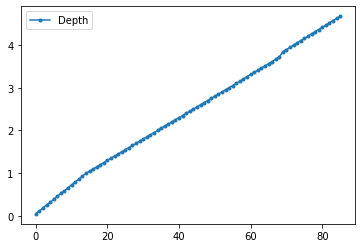

In [152]:
ds[0].data.plot(y=['Depth'],style='.-')

plot depth of all data sets

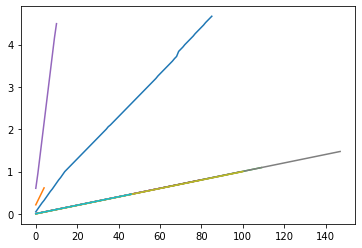

In [153]:
for j in range(0,10,1):
    ds[j].data.Depth.plot()


In [ ]:
# other R examples
#=============== GET DATA =================
#download single dataset - first list, then -> data frame
Joey_core12 <- pg_data(doi="10.1594/PANGAEA.890405")
Joey_core12 <- Joey_core12[[1]]$data

#=============== FILTER SEARCH RESULTS =================
# restrict the search by geographical coordinates with an attribute bbox=c(minlon, minlat, maxlon, maxlat)
# datasets in northern Sweden
PAGES_Sweden <- pg_search("project:label:PAGES_C-PEAT", count = 1000, bbox=c(17.7, 67.7, 21, 69))
#filter only datasets with "Geochemistry" in title (column citation)
PAGES_Sweden <- filter(PAGES_Sweden, grepl("Geochemistry", citation))

#=============== GET MULTIPLE DATA =================
# combine data into a single data frame
PAGES_Sweden_data <- data.frame()
for (i in 1:nrow(PAGES_Sweden)) {
  geochem <- pg_data(doi=PAGES_Sweden[i,2])
  geochem <- geochem[[1]]$data
  geochem$DOI <- PAGES_Sweden[i,2]
  geochem$citation <- PAGES_Sweden[i,5]
  PAGES_Sweden_data <- bind_rows(PAGES_Sweden_data, geochem)
}

#=============== DOWNLOAD MANY BINARY FILES ==================

#create a folder for download
dir.create(path="Files")
folderpath <- "Files/"

# download the images from a single dataset https://doi.pangaea.de/10.1594/PANGAEA.919398
table <- pg_data(doi="10.1594/PANGAEA.919398")
table <- table[[1]]$data
View(table)

#download files listed in the column "IMAGE"
#set he prefix first (see .tab file) https://doi.pangaea.de/10.1594/PANGAEA.919398?format=textfile
prefix <- "https://download.pangaea.de/dataset/919398/files/"

#with a condition ("fauna" in Content)
for (i in (1:nrow(table))){
  if (grepl("fauna", table$'Content'[i]) == TRUE ) {
    download.file(paste(prefix, table$IMAGE[i], sep=""), destfile = paste(folderpath, table$'IMAGE'[i], sep=""))  
  }
}